In [ ]:
#Muhammad tamer
#Sundays group

In [1]:
import numpy as np    
import pandas as pd   
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:
dt = pd.read_csv("E:\markov ml\Python day2\Python day2\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
dt.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
dt.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dt.fillna(0, inplace=True)

In [7]:
dt['TotalCharges'] = dt['TotalCharges'].apply(pd.to_numeric, errors='coerce')
dt.head(10)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

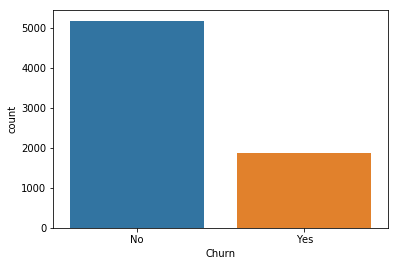

In [8]:
sns.countplot('Churn', data = dt)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
dt['nrm_tenure'] = StandardScaler().fit_transform( dt['tenure'].values.reshape(-1, 1) )
dt['nrm_monthlycharges'] = StandardScaler().fit_transform( dt['MonthlyCharges'].values.reshape(-1, 1) )
dt['nrm_totalcharges'] = StandardScaler().fit_transform( dt['TotalCharges'].values.reshape(-1, 1) )

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
dt.head(12)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-1.277445,-1.160323,-0.994194
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0.066327,-0.259629,-0.173740
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-1.236724,-0.362660,-0.959649
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.514251,-0.746535,-0.195248
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-1.236724,0.197365,-0.940457
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,-0.992402,1.159546,-0.645369
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,-0.422317,0.808907,-0.147313
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Month-to-month,No,Mailed check,29.75,301.90,No,-0.910961,-1.163647,-0.874169
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,-0.177995,1.330711,0.336516
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,1.206498,-0.286218,0.531476


In [24]:
nrm_dt = dt.drop( ['tenure','TotalCharges','MonthlyCharges','customerID'], axis = 1 )
nrm_dt.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.994194
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.173740
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.959649
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.195248
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.940457
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,-0.992402,1.159546,-0.645369
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,-0.422317,0.808907,-0.147313
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No,-0.910961,-1.163647,-0.874169
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,-0.177995,1.330711,0.336516
9,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No,1.206498,-0.286218,0.531476


In [15]:
dt['MultipleLines'].nunique()

3

In [16]:
dt['InternetService'].nunique()

3

In [17]:
for i in dt:
    print( dt[i].unique() )

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']
[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064

In [25]:
nrm_dt.replace(to_replace=r'^No.*$', value='No', regex=True, inplace=True)

nrm_dt.replace('Yes', '1', inplace=True)
nrm_dt.replace('No', '0', inplace=True)
nrm_dt.replace('Male', '0', inplace=True)
nrm_dt.replace('Female', '1', inplace=True)
nrm_dt.replace('DSL', '1', inplace=True)
nrm_dt.replace('Fiber optic', '2', inplace=True)
nrm_dt.replace('Month-to-month', '0', inplace=True)
nrm_dt.replace('One year', '1', inplace=True)
nrm_dt.replace('Two year', '2', inplace=True)
nrm_dt.replace('Electronic check', '0', inplace=True)
nrm_dt.replace('Mailed check', '1', inplace=True)
nrm_dt.replace('Bank transfer (automatic)', '2', inplace=True)
nrm_dt.replace('Credit card (automatic)', '3', inplace=True)

nrm_dt.head(20)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,-1.277445,-1.160323,-0.994194
1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0.066327,-0.259629,-0.173740
2,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,-1.236724,-0.362660,-0.959649
3,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,2,0,0.514251,-0.746535,-0.195248
4,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,1,-1.236724,0.197365,-0.940457
5,1,0,0,0,1,1,2,0,0,1,0,1,1,0,1,0,1,-0.992402,1.159546,-0.645369
6,0,0,0,1,1,1,2,0,1,0,0,1,0,0,1,3,0,-0.422317,0.808907,-0.147313
7,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,-0.910961,-1.163647,-0.874169
8,1,0,1,0,1,1,2,0,0,1,1,1,1,0,1,0,1,-0.177995,1.330711,0.336516
9,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,2,0,1.206498,-0.286218,0.531476


In [20]:
for i in nrm_dt:
    print( nrm_dt[i].unique() )

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
[0 1]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']
[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.0

In [27]:
for i in nrm_dt:
    print( nrm_dt[i].unique() )

['1' '0']
[0 1]
['1' '0']
['0' '1']
['0' '1']
['0' '1']
['1' '2' '0']
['0' '1']
['1' '0']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1' '2']
['1' '0']
['0' '1' '2' '3']
['0' '1']
[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0

In [29]:
for i in nrm_dt:
    nrm_dt[i] = nrm_dt[i].astype(float)
    
nrm_dt.fillna(0, inplace=True)
nrm_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender                7043 non-null float64
SeniorCitizen         7043 non-null float64
Partner               7043 non-null float64
Dependents            7043 non-null float64
PhoneService          7043 non-null float64
MultipleLines         7043 non-null float64
InternetService       7043 non-null float64
OnlineSecurity        7043 non-null float64
OnlineBackup          7043 non-null float64
DeviceProtection      7043 non-null float64
TechSupport           7043 non-null float64
StreamingTV           7043 non-null float64
StreamingMovies       7043 non-null float64
Contract              7043 non-null float64
PaperlessBilling      7043 non-null float64
PaymentMethod         7043 non-null float64
Churn                 7043 non-null float64
nrm_tenure            7043 non-null float64
nrm_monthlycharges    7043 non-null float64
nrm_totalcharges      7043 non-null float64
dtypes: float

In [34]:
nrm_dt.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.277445,-1.160323,-0.994194
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.066327,-0.259629,-0.173740
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.236724,-0.362660,-0.959649
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.514251,-0.746535,-0.195248
4,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.236724,0.197365,-0.940457
5,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.992402,1.159546,-0.645369
6,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,-0.422317,0.808907,-0.147313
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.910961,-1.163647,-0.874169
8,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.177995,1.330711,0.336516
9,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.206498,-0.286218,0.531476


In [41]:
x = nrm_dt.iloc[:, nrm_dt.columns != 'Churn']
y = nrm_dt.iloc[:, nrm_dt.columns == 'Churn']

In [42]:
y.head()

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [43]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.277445,-1.160323,-0.994194
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.066327,-0.259629,-0.173740
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.236724,-0.362660,-0.959649
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.514251,-0.746535,-0.195248
4,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.236724,0.197365,-0.940457


In [45]:
churned_indx = np.array(nrm_dt[nrm_dt.Churn == 1].index)
unchurned_indx = np.array(nrm_dt[nrm_dt.Churn == 0].index)

In [46]:
len(churned_indx)

1869

In [53]:
chrn = len( dt[dt['Churn'] == 'Yes'])
chrn

1869

In [54]:
notchurn = len( dt[dt['Churn'] == 'No'])
notchurn

5174

In [47]:
len(unchurned_indx)

5174

In [57]:
randomunchurned_indx = np.array( np.random.choice(unchurned_indx, chrn, replace = False) )

In [58]:
randomunchurned_indx

array([4382, 4221, 2941, ..., 1404, 1155, 6990], dtype=int64)

In [60]:
len(randomunchurned_indx)

1869

In [62]:
sample_indx = np.concatenate([randomunchurned_indx, churned_indx])

In [63]:
sample_indx

array([4382, 4221, 2941, ..., 7032, 7034, 7041], dtype=int64)

In [64]:
len(sample_indx)

3738

In [66]:
sampledt = nrm_dt.iloc[sample_indx, :]

In [68]:
sampledt.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,nrm_tenure,nrm_monthlycharges,nrm_totalcharges
4382,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.155283,-0.532164,-0.928016
4221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.277445,-1.510962,-0.998849
2941,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,0.0,1.613701,1.103045,2.131354
3664,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.155283,-0.464030,-0.918111
6073,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.287938,-1.324841,-0.303449


In [69]:
len(sampledt)

3738

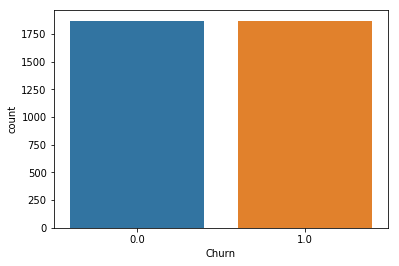

In [70]:
sns.countplot("Churn", data = sampledt)

In [80]:
xsample = sampledt.iloc[:, sampledt.columns != 'Churn']
ysample = sampledt.iloc[ :, sampledt.columns == 'Churn']

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import train_test_split

In [83]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xsample, ysample, test_size = 0.3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Recall metric in the testing dataset:  0.8231046931407943


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


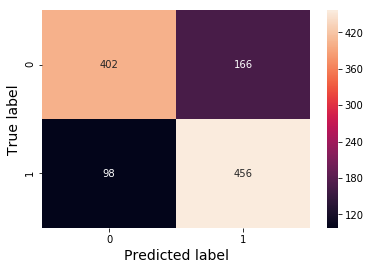

In [91]:
lr = LogisticRegression()

lr.fit( xs_train, ys_train.values.ravel() )

ys_pred = lr.predict( xs_test.values)

cnfmtrx = confusion_matrix(ys_test, ys_pred)

sns.heatmap(cnfmtrx, annot=True, fmt="d")
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

print("Recall metric in the testing dataset: ", cnfmtrx[1,1]/(cnfmtrx[1,0]+cnfmtrx[1,1]))

In [90]:
cnfmtrx

array([[ 948,  353],
       [ 268, 1047]], dtype=int64)

Recall metric in the testing dataset:  0.8044692737430168


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

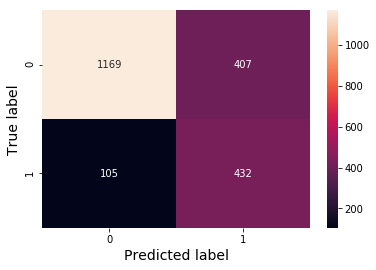

In [92]:
lr = LogisticRegression()

lr.fit( xs_train, ys_train.values.ravel() )

y_pred = lr.predict( x_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
heatmap = sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)